In [ ]:
# 우리나라의 행복지수를 세계의 다른나라와 비교
# dataset https://www.kaggle.com/unsdsn/world-happiness?select=2015.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
import types
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid", palette="bright", font_scale=1.5)

In [5]:
df = pd.read_csv("./2017.csv")
df.head(60)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [ ]:
#Country : Name of the country.

#Region : Region the country belongs to.

#Happiness Rank : Rank of the country based on the Happiness Score.

#Happiness Score : A metric measured in 2015 by asking the sampled people the question: 
    #"How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

#Standard Error : The standard error of the happiness score.

#Economy (GDP per Capita): The extent to which GDP contributes to the calculation of the Happiness Score.

#Family : The extent to which Family contributes to the calculation of the Happiness Score

#Health (Life Expectancy) : The extent to which Life expectancy contributed to the calculation of the Happiness Score

#Freedom : The extent to which Freedom contributed to the calculation of the Happiness Score.

#Trust (Government Corruption) : The extent to which Perception of Corruption contributes to Happiness Score.

# Genorosity : The extent to which Generosity contributed to the calcuation of the Happiness Score.

# Trush.. Government.corruption : The extent to which perception of Corruption contributes to Happiness Score

# Dystopia Residual : The extent to which Dystopia Residual contributes to the calculation of the Happiness Score.

C:\Users\chan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Happiness.Score', ylabel='Density'>

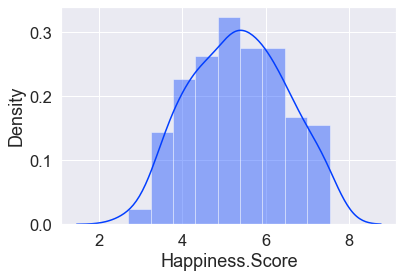

In [6]:
sns.distplot(df['Happiness.Score'])

<AxesSubplot:>

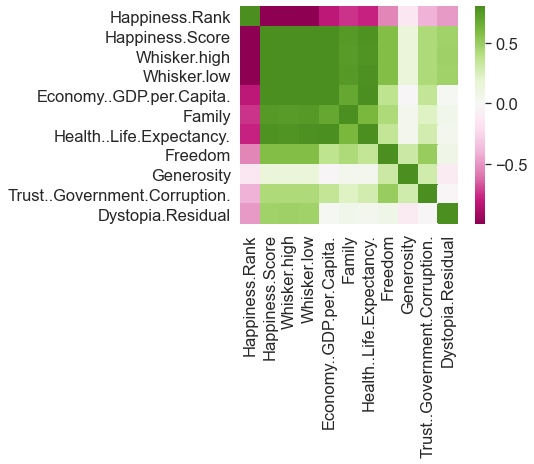

In [7]:
corrmat = df.corr()
# df.corr() : 데이터 상관관계 매트릭스 생성

sns.color_palette("Paired")
sns.heatmap(corrmat, vmax=.8, square=True, cmap="PiYG", center=0)
# seaborn.heatmap() : 열지도(히트맵)을 그려주는 것

In [ ]:
# 두가지 지표가 있을때
# 초록색 : A가 커지면 B도 커진다.
# 빨간색 : A가 커지면 B는 작아진다.

In [8]:
# ploty.offline.iplot() : 지도에 데이터를 표시한다. 
data = dict(type = 'choropleth', locations=df['Country'], locationmode='country names', z=df['Happiness.Rank'], 
            text=df['Country'],colorbar={'title':'Happiness'})

layout = dict(title = 'Global Happiness 2017', geo=dict(showframe = False))
choromap3 = go.Figure(data=[data], layout=layout)
iplot(choromap3)